In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json

# Load the dataset
dataset = pd.read_csv("updated_dataset_with_perplexity.csv")

# Check the number of rows
num_rows = len(dataset)
print(num_rows)

# # Initialize TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100)

# # Fit and transform the text data
# tfidf_features = tfidf_vectorizer.fit_transform(dataset["text"])
# tfidf_array = tfidf_features.toarray()
# tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# # Print the TF-IDF features
# # print("TF-IDF Features:\n", tfidf_array)
# dataset["tf-idf"] = [
#     json.dumps({tfidf_vocab[i]: round(value, 4) for i, value in enumerate(row) if value > 0})
#     for row in tfidf_array
# ]


# Convert to DataFrame for inspection
# tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# print("TF-IDF Features:\n", tfidf_df)


11500


In [9]:
for idx in range(10):
    print(f"Row {idx}:")
    print(dataset.iloc[idx]['tf-idf'])
    print("-" * 50)

Row 0:


KeyError: 'tf-idf'

In [10]:
import re

def preprocess_text(text):
    text = re.sub(r"[^\w\s.,!?']", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace
    return text

dataset["preprocessed_text"] = dataset["text"].apply(preprocess_text)


In [11]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import numpy as np

# Load a small LLM
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

def calculate_token_probabilities(text):
    try:
        tokens = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)
        with torch.no_grad():
            outputs = model(tokens, labels=tokens)
            loss = outputs.loss  # Cross-entropy loss
        perplexity = torch.exp(loss)  # Perplexity of the sequence
        return perplexity.item()
    except IndexError as e:
        print(f"Error processing text: {text}")
        print(f"Error: {e}")
        return None

dataset["token_probability"] = dataset["preprocessed_text"].apply(calculate_token_probabilities)



Token indices sequence length is longer than the specified maximum sequence length for this model (1025 > 1024). Running this sequence through the model will result in indexing errors


Error processing text: As my opinion i disagree because you could be someone beyond the world if you are positive of yourself. you could take a risk of many things you want to do in life and become something wonderful of it. you can graduate and became someone you wanted to, thats growing masterly of no matter how many times you have try but where has got you. Be a person with so many mistakes but the also is going to learn from them and,you will still come back up and start trying again. If you have done so many things and you still feel like no other person is going to appreciate of the things you have done and then you feel like theres nothing that you could do that could be good enough for nobody. Dont stop trying do not ever make yourself feel like you gotta do things for other people just be great how you are with or without mistakes you could be wonderful and make yourself happy and proud of them. In life theres so many responsibilities you have to take care of and no matter wha

In [13]:
for idx in range(10):
    print(f"Row {idx}:")
    print(dataset.iloc[idx]['preprocessed_text'])
    print(dataset.iloc[idx]['token_probability'])
    print("-" * 50)

Row 0:
Growth is an essential part of life, and one of the best ways to achieve it is by trying something new. Whether it's learning a new skill, traveling to a new place, or exploring a new hobby, stepping outside of your comfort zone can be both exhilarating and challenging. In this essay, I will explore the pros and cons of trying something new and provide tips to help readers succeed in it. One of the biggest advantages of trying something new is that it allows you to expand your horizons and gain new experiences. Whether it's learning a new language or taking up a new sport, stepping out of your comfort zone can help you discover new passions and interests that you may not have known existed. Additionally, trying something new can help you build confidence and selfesteem. When you successfully complete a new task or activity, you feel a sense of accomplishment and pride, which can help you feel more confident in other areas of your life. However, trying something new can also have

In [16]:
!python3 -m pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip


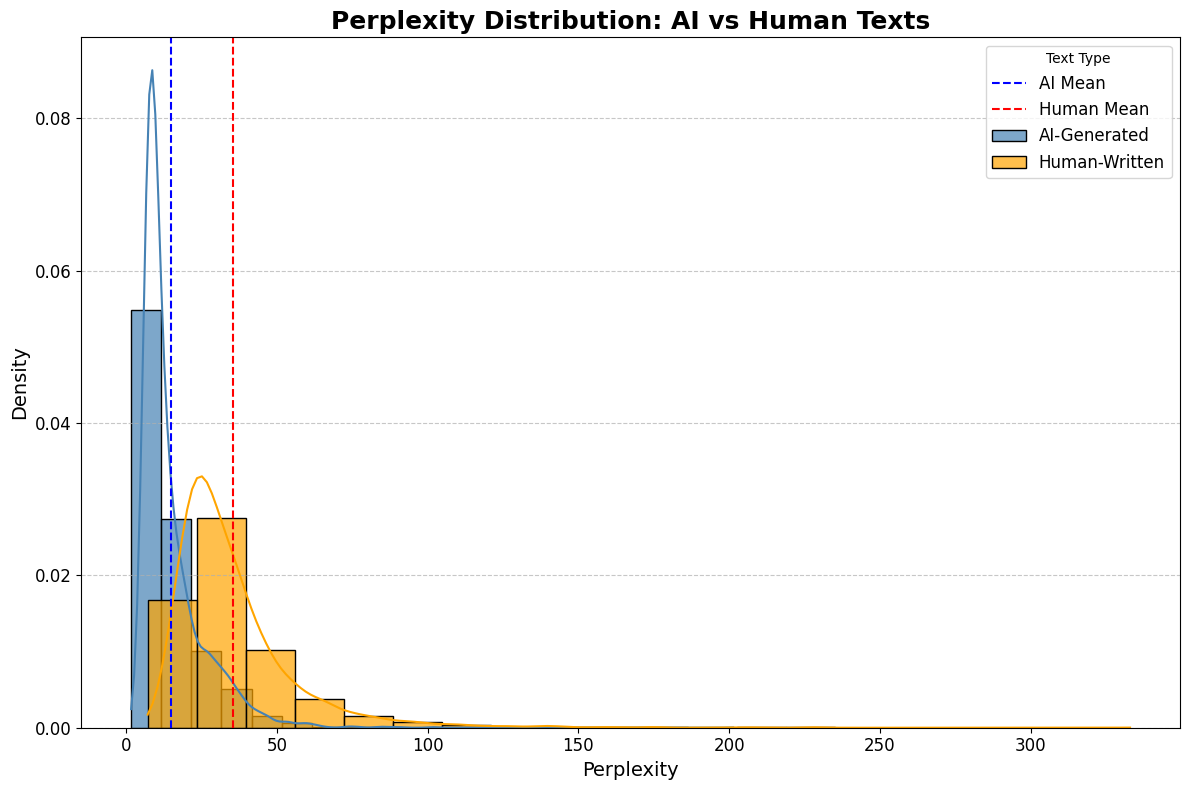

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_dataset = dataset[~dataset["token_probability"].isnull()].copy()

# Separate AI and Human data
ai_perplexity = filtered_dataset[filtered_dataset["generated"] == "1"]["token_probability"]
human_perplexity = filtered_dataset[filtered_dataset["generated"] == "0"]["token_probability"]

plt.figure(figsize=(12, 8))

# Plot AI Perplexity
sns.histplot(
    ai_perplexity,
    bins=20,
    kde=True,
    color="steelblue",
    label="AI-Generated",
    stat="density",
    alpha=0.7
)

# Plot Human Perplexity
sns.histplot(
    human_perplexity,
    bins=20,
    kde=True,
    color="orange",
    label="Human-Written",
    stat="density",
    alpha=0.7
)

# Add Vertical Lines for Mean Perplexity
plt.axvline(ai_perplexity.mean(), color="blue", linestyle="--", linewidth=1.5, label="AI Mean")
plt.axvline(human_perplexity.mean(), color="red", linestyle="--", linewidth=1.5, label="Human Mean")

# Add Titles and Labels
plt.title("Perplexity Distribution: AI vs Human Texts", fontsize=18, fontweight="bold")
plt.xlabel("Perplexity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add Legend
plt.legend(title="Text Type", fontsize=12, loc="upper right")

# Add Gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()

In [25]:
print(filtered_dataset.head())
print(filtered_dataset["generated"].unique())


       essay_id                                               text  \
0  98FDB2315471  Growth is an essential part of life, and one o...   
1  F3996EB91406  When people are not accepted for who they trul...   
2  72A69C1B34A8  Hey, I'm just a regular 8th grader, so bear wi...   
3  DCF9F70FBA91  The debate between nature versus nurture in de...   
4  84192B65683A   Community parks are a great place to enjoy th...   

                 source generated  temp  \
0  mistral7binstruct_v1         1   0.0   
1         chat_gpt_moth         1   0.0   
2           llama2_chat         1   0.0   
3         chat_gpt_moth         1   0.0   
4  mistral7binstruct_v2         1   0.0   

                                   preprocessed_text  token_probability  
0  Growth is an essential part of life, and one o...           7.038640  
1  When people are not accepted for who they trul...          18.238476  
2  Hey, I'm just a regular 8th grader, so bear wi...          13.299950  
3  The debate between na

In [23]:
print(filtered_dataset["token_probability"].isnull().sum())  # Count missing values
print(filtered_dataset["token_probability"].describe()) 


0
count    11345.000000
mean        25.485447
std         19.715772
min          1.661693
25%         10.896229
50%         21.399088
75%         33.113266
max        332.986084
Name: token_probability, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


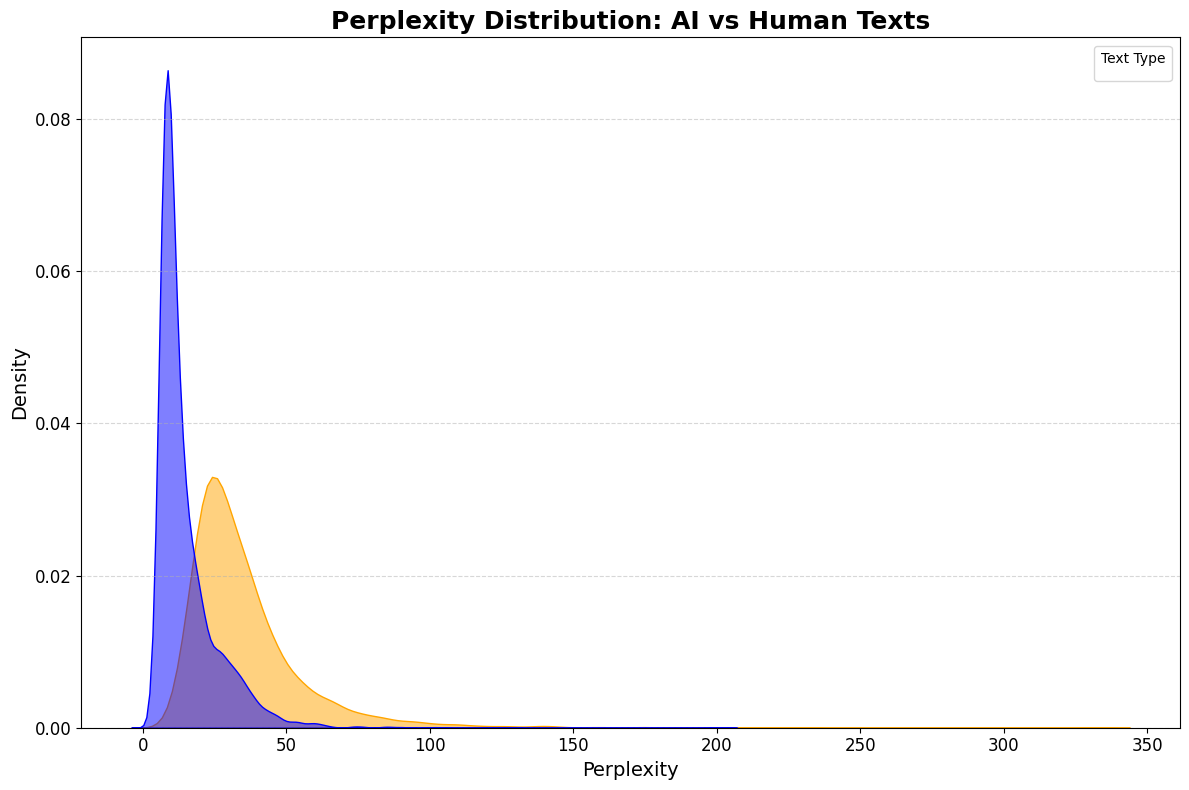

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map labels for better readability
filtered_dataset["label"] = filtered_dataset["generated"].map({'0': "Human", '1': "AI"})

plt.figure(figsize=(12, 8))

# KDE Plot
sns.kdeplot(
    data=filtered_dataset,
    x="token_probability",
    hue="label",
    fill=True,
    common_norm=False,
    alpha=0.5,
    palette={"AI": "blue", "Human": "orange"}
)

# Add Titles and Labels
plt.title("Perplexity Distribution: AI vs Human Texts", fontsize=18, fontweight="bold")
plt.xlabel("Perplexity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add Legend
plt.legend(title="Text Type", fontsize=12, loc="upper right")

# Show Plot
plt.tight_layout()
plt.show()


/var/folders/m9/4j5hjgcd5qngvl020z555w240000gn/T/ipykernel_79271/294547691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


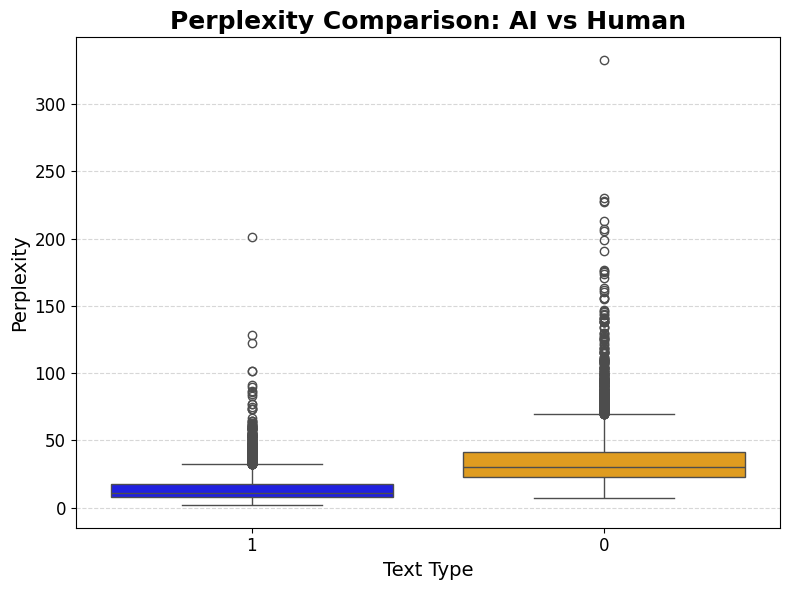

In [37]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x="generated",
    y="total_probability",
    data=dataset,
    palette={"1": "blue", "0": "orange"}
)

# Add Titles and Labels
plt.title("Perplexity Comparison: AI vs Human", fontsize=18, fontweight="bold")
plt.xlabel("Text Type", fontsize=14)
plt.ylabel("Perplexity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show Plot
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load model and tokenizer
model_name = "gpt2"  # Replace with your model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Function to calculate perplexity for a chunk
def calculate_chunk_perplexity(chunk, tokenizer, model):
    try:
        tokens = tokenizer.encode(chunk, return_tensors="pt", truncation=True)
        with torch.no_grad():
            outputs = model(tokens, labels=tokens)
            loss = outputs.loss
        return torch.exp(loss).item()
    except Exception as e:
        print(f"Error processing chunk: {chunk[:50]}... | Error: {e}")
        return None

# Function to handle long texts by splitting into chunks
def calculate_text_perplexity(text, tokenizer, model, max_length=1024):
    tokens = tokenizer.encode(text)
    if len(tokens) <= max_length:
        return calculate_chunk_perplexity(text, tokenizer, model)
    else:
        chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
        chunk_texts = [tokenizer.decode(chunk) for chunk in chunks]
        perplexities = [
            calculate_chunk_perplexity(chunk, tokenizer, model)
            for chunk in chunk_texts
            if calculate_chunk_perplexity(chunk, tokenizer, model) is not None
        ]
        if perplexities:
            return sum(perplexities) / len(perplexities)
        else:
            return None

# Function to process dataset in batches
def process_batches(dataset, batch_size=100, save_path="dataset_with_perplexities.csv", max_length=1024):
    total_rows = len(dataset)
    for start in range(0, total_rows, batch_size):
        end = min(start + batch_size, total_rows)
        batch = dataset.iloc[start:end]
        print(f"Processing batch {start // batch_size + 1} ({start}-{end})...")

        for idx, row in batch.iterrows():
            if pd.notnull(row["perplexity"]):  # Skip already processed rows
                continue
            perplexity = calculate_text_perplexity(row["text"], tokenizer, model, max_length)
            dataset.at[idx, "perplexity"] = perplexity

        # Save progress after each batch
        # dataset.to_csv(save_path, index=False)
        print(f"Completed batch {start // batch_size + 1} and saved to {save_path}")

# Load dataset
dataset = pd.read_csv("updated_dataset_with_perplexity.csv")
if "perplexity" not in dataset.columns:
    dataset["perplexity"] = None

# Process in batches of 100
process_batches(dataset, batch_size=100, save_path="updated_dataset_with_perplexity.csv")


Token indices sequence length is longer than the specified maximum sequence length for this model (1025 > 1024). Running this sequence through the model will result in indexing errors


Processing batch 1 (0-100)...
Completed batch 1 and saved to updated_dataset_with_perplexity.csv
Processing batch 2 (100-200)...
Completed batch 2 and saved to updated_dataset_with_perplexity.csv
Processing batch 3 (200-300)...
Completed batch 3 and saved to updated_dataset_with_perplexity.csv
Processing batch 4 (300-400)...
Completed batch 4 and saved to updated_dataset_with_perplexity.csv
Processing batch 5 (400-500)...
Completed batch 5 and saved to updated_dataset_with_perplexity.csv
Processing batch 6 (500-600)...
Completed batch 6 and saved to updated_dataset_with_perplexity.csv
Processing batch 7 (600-700)...
Completed batch 7 and saved to updated_dataset_with_perplexity.csv
Processing batch 8 (700-800)...
Completed batch 8 and saved to updated_dataset_with_perplexity.csv
Processing batch 9 (800-900)...
Completed batch 9 and saved to updated_dataset_with_perplexity.csv
Processing batch 10 (900-1000)...
Completed batch 10 and saved to updated_dataset_with_perplexity.csv
Processin

In [21]:
invalid_rows = dataset[dataset["generated"] == "generated"]

# Display these rows
print(invalid_rows)

dataset = dataset[dataset["generated"].isin(["0", "1"])]

                 essay_id  text source  generated  temp  perplexity
10199  gpt_4o_mini_010200  text    NaN  generated   NaN         NaN


/var/folders/m9/4j5hjgcd5qngvl020z555w240000gn/T/ipykernel_50633/3449946976.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


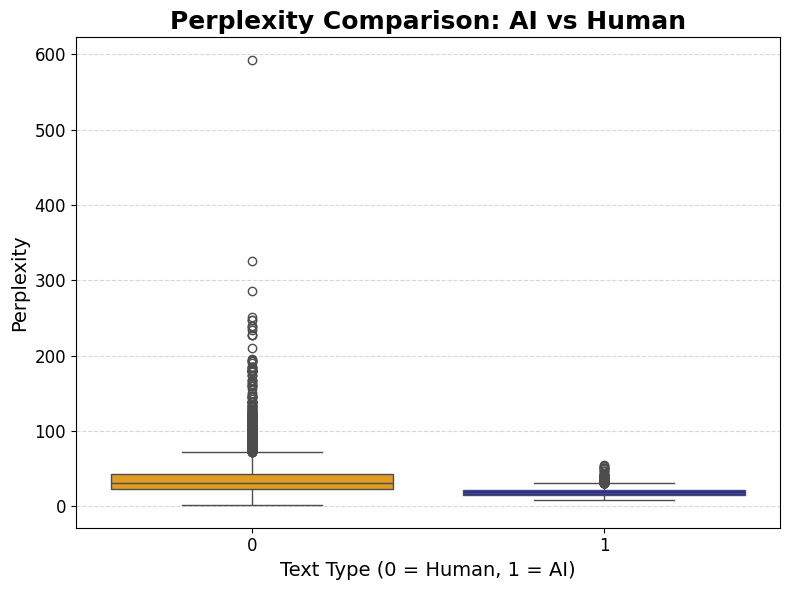

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

dataset = pd.read_csv("huggingface_with_perplexity.csv")

sns.boxplot(
    x="generated",
    y="perplexity",
    data=dataset,
    palette={"1": "blue", "0": "orange"}  # Use string keys for the palette
)

# Add Titles and Labels
plt.title("Perplexity Comparison: AI vs Human", fontsize=18, fontweight="bold")
plt.xlabel("Text Type (0 = Human, 1 = AI)", fontsize=14)
plt.ylabel("Perplexity", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show Plot
plt.tight_layout()
plt.show()


In [38]:

import pandas as pd

df_features = pd.read_csv("Dataset_with_features.csv")
df_perplexity = pd.read_csv("updated_dataset_with_perplexity.csv")
df_ratio = pd.read_csv("new_dataset.csv")

In [39]:
df_features.shape[0]

11500

In [40]:
df_perplexity.shape[0]

11500

In [41]:
df_ratio.shape[0]

11500

In [43]:
print(f"Duplicate essay_id in df_perplexity: {df_perplexity['essay_id'].duplicated().sum()}")
print(f"Duplicate essay_id in df_ratio: {df_ratio['essay_id'].duplicated().sum()}")
print(f"Duplicate essay_id in df_ratio: {df_features['essay_id'].duplicated().sum()}")


Duplicate essay_id in df_perplexity: 1889
Duplicate essay_id in df_ratio: 1889
Duplicate essay_id in df_ratio: 1889


In [46]:
# Find all duplicate rows (including originals)
all_duplicates = df_features[df_features.duplicated(subset="essay_id", keep=False)]

# Sort by 'essay_id' to group originals and duplicates together
all_duplicates = all_duplicates.sort_values(by="essay_id")

# Display the results
print(all_duplicates)

# Optional: Save to a CSV for inspection
all_duplicates.to_csv("all_duplicates_with_originals.csv", index=False)


       essay_id                                               text source  \
1267   0059830c  Cars. Cars have been around since they became ...    NaN   
4761   0059830c  Cars. Cars have been around since they became ...  human   
7604   00940276  How often do you ride in a car? Do you drive a...    NaN   
5031   00940276  How often do you ride in a car? Do you drive a...  human   
8203   01448434  Fellow citizens, cars have become a major role...  human   
...         ...                                                ...    ...   
10135  f71c4319  Limiting car use can help us live better lives...  human   
10757  fe3724b4  Driving cars can be a danger to humans, but al...    NaN   
906    fe3724b4  Driving cars can be a danger to humans, but al...  human   
3465   ffa247e0  There's a new trend that has been developing f...    NaN   
2644   ffa247e0  There's a new trend that has been developing f...  human   

      generated  temp  word_count  average_word_length  vocabulary_richness

In [47]:
# Drop duplicates from the main dataset
df_features = df_features.drop_duplicates(subset="essay_id", keep="first").reset_index(drop=True)

# Drop duplicates from the perplexity dataset
df_perplexity = df_perplexity.drop_duplicates(subset="essay_id", keep="first").reset_index(drop=True)

# Drop duplicates from the ai_ratio dataset
df_ratio = df_ratio.drop_duplicates(subset="essay_id", keep="first").reset_index(drop=True)

# Verify that duplicates are removed
print(f"Features dataset rows: {len(df_features)}")
print(f"Perplexity dataset rows: {len(df_perplexity)}")
print(f"AI Ratio dataset rows: {len(df_ratio)}")


Features dataset rows: 9611
Perplexity dataset rows: 9611
AI Ratio dataset rows: 9611


In [48]:
df_features = df_features.merge(
    df_perplexity[["essay_id", "perplexity"]],
    on="essay_id",
    how="left"
)

# Merge ai_ratio from dataset3 into dataset1
df_features = df_features.merge(
    df_ratio[["essay_id", "ai_ratio"]],
    on="essay_id",
    how="left"
)

# Save the updated dataset
df_features.to_csv("Dataset_with_new_features.csv", index=False)

# Display the updated dataset info
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9611 entries, 0 to 9610
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   essay_id               9611 non-null   object 
 1   text                   9611 non-null   object 
 2   source                 8699 non-null   object 
 3   generated              9611 non-null   object 
 4   temp                   9610 non-null   float64
 5   word_count             9611 non-null   int64  
 6   average_word_length    9611 non-null   float64
 7   vocabulary_richness    9611 non-null   float64
 8   flesch_kincaid         9611 non-null   float64
 9   gunning_fog            9611 non-null   float64
 10  smog_index             9611 non-null   float64
 11  polarity               9611 non-null   float64
 12  subjectivity           9611 non-null   float64
 13  misspelled_word_count  9611 non-null   int64  
 14  sentence_length        9611 non-null   float64
 15  punc

In [49]:
df_features.shape[0]

9611

In [50]:
dataset_new = pd.read_csv("Dataset_with_new_features.csv")

dataset_new.shape[0]

9611

In [4]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load model and tokenizer
model_name = "gpt2"  # Replace with your model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# GPT2 maximum sequence length
MODEL_MAX_LENGTH = model.config.max_position_embeddings  # Usually 1024 for GPT2

# Function to calculate perplexity for a chunk
def calculate_chunk_perplexity(chunk, tokenizer, model):
    try:
        tokens = tokenizer.encode(chunk, return_tensors="pt", truncation=True, max_length=MODEL_MAX_LENGTH)
        if tokens.size(1) == 0:
            print(f"Empty token sequence for chunk: {chunk[:50]}...")
            return None
        with torch.no_grad():
            outputs = model(tokens, labels=tokens)
            loss = outputs.loss
            if loss is None or torch.isnan(loss):
                print(f"Loss is NaN for chunk: {chunk[:50]}...")
                return None
        return torch.exp(loss).item()
    except Exception as e:
        print(f"Error processing chunk: {chunk[:50]}... | Error: {e}")
        return None

# Function to handle long texts by splitting into chunks
def calculate_text_perplexity(text, tokenizer, model):
    tokens = tokenizer.encode(text)
    if len(tokens) <= MODEL_MAX_LENGTH:
        # If the sequence is within the model's maximum length, process directly
        return calculate_chunk_perplexity(text, tokenizer, model)
    else:
        # Split into chunks of up to MODEL_MAX_LENGTH tokens
        chunks = [tokens[i:i + MODEL_MAX_LENGTH] for i in range(0, len(tokens), MODEL_MAX_LENGTH)]
        chunk_texts = [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]
        perplexities = []
        for chunk in chunk_texts:
            chunk_perplexity = calculate_chunk_perplexity(chunk, tokenizer, model)
            if chunk_perplexity is not None:
                perplexities.append(chunk_perplexity)
        if perplexities:
            return sum(perplexities) / len(perplexities)  # Average perplexity over chunks
        return None

# Function to process dataset in batches for NaN perplexity rows
def recalculate_na_perplexity_in_batches(dataset, batch_size=100, save_path="Dataset_with_new_features.csv"):
    rows_with_na = dataset[dataset['perplexity'].isna()]  # Filter rows with NaN perplexity
    print(f"Total rows with NaN perplexity: {len(rows_with_na)}")
    
    total_rows = len(rows_with_na)
    for start in range(0, total_rows, batch_size):
        end = min(start + batch_size, total_rows)
        batch_indices = rows_with_na.index[start:end]  # Indices of the current batch
        print(f"Processing batch {start // batch_size + 1} ({start}-{end})...")
        
        for idx in batch_indices:
            row = dataset.loc[idx]
            perplexity = calculate_text_perplexity(row["text"], tokenizer, model)
            dataset.at[idx, "perplexity"] = perplexity  # Update the dataset
        
        # Save progress after each batch
        dataset.to_csv(save_path, index=False)
        print(f"Completed batch {start // batch_size + 1} and saved to {save_path}")

# Load dataset
dataset = pd.read_csv("Dataset_with_new_features.csv")

# Ensure 'perplexity' column exists
if "perplexity" not in dataset.columns:
    dataset["perplexity"] = None

# Clean text column to avoid issues
dataset['text'] = dataset['text'].fillna('').str.strip()

# Recalculate perplexity for NaN rows in batches
recalculate_na_perplexity_in_batches(dataset, batch_size=100, save_path="Dataset_with_new_features.csv")


Total rows with NaN perplexity: 4348
Processing batch 1 (0-100)...


Token indices sequence length is longer than the specified maximum sequence length for this model (1335 > 1024). Running this sequence through the model will result in indexing errors


Completed batch 1 and saved to Dataset_with_new_features.csv
Processing batch 2 (100-200)...
Completed batch 2 and saved to Dataset_with_new_features.csv
Processing batch 3 (200-300)...
Completed batch 3 and saved to Dataset_with_new_features.csv
Processing batch 4 (300-400)...
Completed batch 4 and saved to Dataset_with_new_features.csv
Processing batch 5 (400-500)...
Completed batch 5 and saved to Dataset_with_new_features.csv
Processing batch 6 (500-600)...
Completed batch 6 and saved to Dataset_with_new_features.csv
Processing batch 7 (600-700)...
Completed batch 7 and saved to Dataset_with_new_features.csv
Processing batch 8 (700-800)...
Loss is NaN for chunk: text...
Completed batch 8 and saved to Dataset_with_new_features.csv
Processing batch 9 (800-900)...
Completed batch 9 and saved to Dataset_with_new_features.csv
Processing batch 10 (900-1000)...
Completed batch 10 and saved to Dataset_with_new_features.csv
Processing batch 11 (1000-1100)...
Completed batch 11 and saved to D

In [6]:
# Check the total number of NaNs in each column
nan_summary = dataset.isna().sum()
print("\nCount of NaN values per column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values


Count of NaN values per column:
source        912
temp            1
perplexity      1
dtype: int64


In [8]:
dataset.dropna()

,essay_id,text,source,generated,temp,word_count,average_word_length,vocabulary_richness,flesch_kincaid,gunning_fog,...,noun_count,verb_count,adjective_count,adverb_count,noun_density,verb_density,adjective_density,adverb_density,perplexity,ai_ratio
0,77D8760F4BBE,Driverless cars\n\nI think driverless cars wil...,human,0,0.0,190,4.257895,0.584211,9.0,9.94,...,47,41,9,9,0.229268,0.200000,0.043902,0.043902,47.675053,0.015789
1,2FEA75A93DBB,"In my opinion I think that this ""Face on Mars""...",human,0,0.0,412,4.111650,0.432039,6.6,9.31,...,82,87,23,25,0.179825,0.190789,0.050439,0.054825,20.676014,0.002364
2,llama_70b_v1225,"Dear Fellow Citzens,\n\nWe all know that cars ...",llama_70b,1,0.0,300,4.166667,0.536667,2.6,5.45,...,68,63,27,16,0.195965,0.181556,0.077810,0.046110,14.900404,0.035948
3,EDFFA0E4D88C,"In recent years, there has been a growing deba...",mistral7binstruct_v2,1,0.0,417,4.769784,0.462830,7.9,9.89,...,114,74,39,26,0.243070,0.157783,0.083156,0.055437,6.837327,0.054863
4,B29C1E38F12E,I agree with the principal that students must ...,human,0,0.0,327,4.100917,0.284404,7.7,9.85,...,57,78,7,23,0.164740,0.225434,0.020231,0.066474,16.376251,0.003003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606,llama_70b_v1462,Libraries have been a vital part of our societ...,llama_70b,1,0.0,401,5.516209,0.513716,12.3,12.43,...,116,69,50,23,0.255507,0.151982,0.110132,0.050661,8.759274,0.170370
9607,C88B4EAD8DE4,I agree with the decision to mandate all stude...,human,0,0.0,564,5.242908,0.421986,14.0,12.64,...,150,101,58,18,0.246305,0.165846,0.095238,0.029557,14.549755,0.068063
9608,876B9CDDC1FC,I don't understand why people feel the need to...,mistral7binstruct_v2,1,0.0,218,4.454128,0.591743,6.6,7.45,...,40,55,17,20,0.150376,0.206767,0.063910,0.075188,13.781466,0.038627
9609,18860E0DA892,"Dear State Senator,\n\nWe should be able to ke...",human,0,0.0,214,5.070093,0.602804,9.7,11.35,...,65,47,11,3,0.250965,0.181467,0.042471,0.011583,25.730434,0.017857


In [11]:
# Identify rows where 'generated' == 'generated'
rows_to_drop = dataset[dataset['generated'] == 'generated'].index

# Drop these rows
dataset = dataset.drop(rows_to_drop)
